In [86]:
import numpy as np
import pandas as pd

from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

C:\Users\davroble1\AppData\Local\Temp\ipykernel_12052\1695220138.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# The UNSW dataset
Published in "UNSW-NB15: A Comprehensive Data set for Network
Intrusion Detection systems" https://ieeexplore.ieee.org/document/7348942

This data set has a hybrid of the real modern normal and the contemporary synthesized attack activities of the network traffic. Existing and novel methods are utilised to generate the features of the UNSWNB15 data set.

The dataset contains 47 features per observation, which include:

- basic features (i.e., destination bits per second)
- flow features (source IP address, etc.), 
- content features (i.e., Mean of the flow packet size transmitted by the dst ), 
- time features (Source inter-packet arrival time),
- derived or generated features (i. e., No. of flows that has methods such as Get and Post in http service. )
- connection features (i.e., No. of connections that contain the same service (14) and source address (1) in 100 connections according to the last time (26). )


# Explore the dataset

In [87]:
# read data frame
df = pd.read_csv('UNSW_NB15_training-set.csv')



print("Shape of data frame ", df.shape[0])
print("Set of 10 records")


df.describe(include = "all")

Shape of data frame  82332
Set of 10 records


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,82332.000000,82332.000000,82332,82332,82332,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332,82332.000000
unique,NaN,NaN,131,13,7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,43095,47153,39339,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37000,NaN
mean,41166.500000,1.006756,NaN,NaN,NaN,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,...,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,NaN,0.550600
std,23767.345519,4.710444,NaN,NaN,NaN,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,...,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,NaN,0.497436
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,20583.750000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,NaN,0.000000
50%,41166.500000,0.014138,NaN,NaN,NaN,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,...,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,NaN,1.000000
75%,61749.250000,0.719360,NaN,NaN,NaN,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,...,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,NaN,1.000000


In [88]:
df.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.09020,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.00030,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.00510,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.66080,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.00250,...,1,3,0,0,0,2,3,0,Normal,0
5,6,0.000003,udp,-,INT,2,0,784,0,333333.32150,...,1,2,0,0,0,2,2,0,Normal,0
6,7,0.000006,udp,-,INT,2,0,1960,0,166666.66080,...,1,2,0,0,0,2,2,0,Normal,0
7,8,0.000028,udp,-,INT,2,0,1384,0,35714.28522,...,1,3,0,0,0,1,3,0,Normal,0
8,9,0.000000,arp,-,INT,1,0,46,0,0.00000,...,2,2,0,0,0,2,2,1,Normal,0
9,10,0.000000,arp,-,INT,1,0,46,0,0.00000,...,2,2,0,0,0,2,2,1,Normal,0


# Basic preprocessing

In [89]:
# drop the id and attack category, not used 
list_drop = ['id','attack_cat']
df.drop(list_drop, axis=1,inplace = True)

We need to be careful with the range anda values of the histogram:


array([[<Axes: title={'center': 'label'}>]], dtype=object)

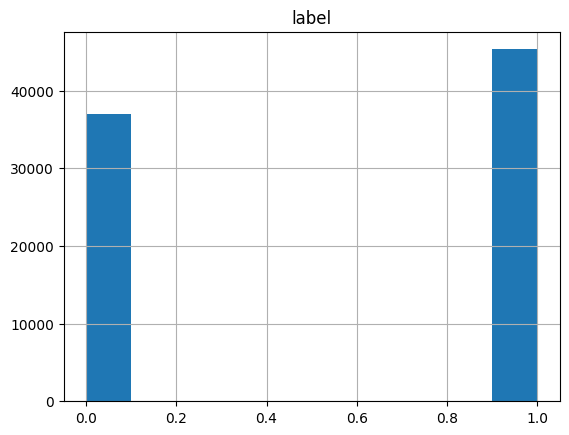

In [90]:
print("We need to be careful with the range anda values of the histogram:")
df.hist(column = "label")

# Encode the categorical features
The features state, protocol  and service (number 1, 2 and 3) are encoded  using one hot vector encoding, as those are categorical variables.



## First reduce the cardinality to reduce one hot encoded features dimensionality

In [91]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X.head()
feature_names = list(X.columns)
print("Original dimensionality before one hot encoding: ")
print("X  shape ", X.shape)

print("Number of different values per column using the dataframe ")
df.describe(include='all')

Original dimensionality before one hot encoding: 
X  shape  (82332, 42)
Number of different values per column using the dataframe 


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332,82332,82332,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
unique,NaN,131,13,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,43095,47153,39339,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.006756,NaN,NaN,NaN,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,4.710444,NaN,NaN,NaN,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.014138,NaN,NaN,NaN,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,0.719360,NaN,NaN,NaN,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000


The variable state has 7 different values, service 13 and protocol 131... perhaps there are too many values for each column. Therefore we can reduce the *cardinality* of the columns to use the 6 most frequent values. Otherwise, the dimensionality of the one hot vector variables will be too high!

In [92]:
#data frame with only the categorical variables
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

#service also defines the '-' category (to represent an unknown service) 

,proto,service,state
count,82332,82332,82332
unique,131,13,7
top,tcp,-,FIN
freq,43095,47153,39339


In [93]:
DEBUG = 1
for feature in df_cat.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_cat[feature].nunique()))
        print("Is the cardinality higher than 6? ", df_cat[feature].nunique()>6)
        print("Number of preserved records: ", sum(df[feature].isin(df[feature].value_counts().head().index)))
        print("New categories: (- takes the rest of categories)", df[feature].value_counts().head().index)
        print('----------------------------------------------------')
    
    if df_cat[feature].nunique()>6:
        #preserve only the records with values within the first 5 most frequent values (default by pandas)
        #replace with '-' if the value is not between the 5 most frequent
        df[feature] = np.where(df[feature].isin(df[feature].value_counts().head().index), df[feature], '-')

proto
nunique = 131
Is the cardinality higher than 6?  True
Number of preserved records:  77691
New categories: (- takes the rest of categories) Index(['tcp', 'udp', 'unas', 'arp', 'ospf'], dtype='object', name='proto')
----------------------------------------------------


service
nunique = 13
Is the cardinality higher than 6?  True
Number of preserved records:  80210
New categories: (- takes the rest of categories) Index(['-', 'dns', 'http', 'smtp', 'ftp'], dtype='object', name='service')
----------------------------------------------------
state
nunique = 7
Is the cardinality higher than 6?  True
Number of preserved records:  82330
New categories: (- takes the rest of categories) Index(['FIN', 'INT', 'CON', 'REQ', 'ACC'], dtype='object', name='state')
----------------------------------------------------


Let's see how the dataframe of categorical variables ended (much less unique values must appear): 

In [94]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,6,5,6
top,tcp,-,FIN
freq,43095,49275,39339


## Encode cardinality reduced columns
A total of 6 + 5 + 6 = 17 features are added, to the 42 - 3 = 39 features
We yield then 39 + 17 = 56 columns or fields

In [95]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
feature_names = list(X.columns)
print("Number of features before one hot encoding: ", len(feature_names))
#create the one hot encoder transformer and transform:
#columns 1, 2 and 3 are the ones to encode
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

print("Number of features after one hot encoding: ", X.shape)

Number of features before one hot encoding:  42
Number of features after one hot encoding:  (82332, 56)


# Prepare for model training

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify=y)

## Model metrics

In [97]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay # will plot the confusion matrix
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])

We are going to test a logistic regression

In [98]:
#time
from sklearn.linear_model import LogisticRegression
start = time.time()
model = LogisticRegression().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

c:\Users\davroble1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [99]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Logistic'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 75.51%
Recall: 75.51%
Precision: 77.55%
F1-Score: 75.47%
time to train: 1.11 s
time to predict: 0.00 s
total: 1.11 s


# Logistic Regression with Synthetic Data

## Import Libraries

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

## Define Sigmoid, Cost Function, and Gradient Function

In [101]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function for logistic regression
def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    return (-1/m) * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h)))

# Gradient function for logistic regression
def gradient(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    return (1/m) * X.T.dot(h - y)

## Train Logistic Regression Model

In [102]:
# Training the logistic regression model
def train_logistic_regression(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []

    for _ in range(iterations):
        grad = gradient(theta, X, y)
        theta -= learning_rate * grad
        cost_history.append(cost_function(theta, X, y))
    
    return theta, cost_history

# Predicting using the logistic regression model
def predict(theta, X):
    return sigmoid(X.dot(theta)) >= 0.5

# Mean Absolute Error (MAE) calculation
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

## Generate Data

In [103]:
# Generate linearly separable data
X_linear, y_linear = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, class_sep=2)

# Generate non-linearly separable data
X_nonlinear, y_nonlinear = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, class_sep=0.5)


## Prepare Data for Training and Testing

In [104]:
# Prepare data by adding bias term and splitting into training and test sets
def prepare_data(X, y):
    X = np.hstack([np.ones((X.shape[0], 1)), X])  # Add bias term
    return train_test_split(X, y, test_size=0.3, random_state=42)

X_train_linear, X_test_linear, y_train_linear, y_test_linear = prepare_data(X_linear, y_linear)
X_train_nonlinear, X_test_nonlinear, y_train_nonlinear, y_test_nonlinear = prepare_data(X_nonlinear, y_nonlinear)

## Train and Evaluate Model for Linearly Separable Data

In [105]:
# Train the model and evaluate MAE for linearly separable data
theta_linear, cost_history_linear = train_logistic_regression(X_train_linear, y_train_linear)
y_pred_linear = predict(theta_linear, X_test_linear)
mae_linear = mean_absolute_error(y_test_linear, y_pred_linear)


## Train and Evaluate Model for Non-Linearly Separable Data

In [106]:
# Train the model and evaluate MAE for non-linearly separable data
theta_nonlinear, cost_history_nonlinear = train_logistic_regression(X_train_nonlinear, y_train_nonlinear)
y_pred_nonlinear = predict(theta_nonlinear, X_test_nonlinear)
mae_nonlinear = mean_absolute_error(y_test_nonlinear, y_pred_nonlinear)

## Plot Cost Function During Training

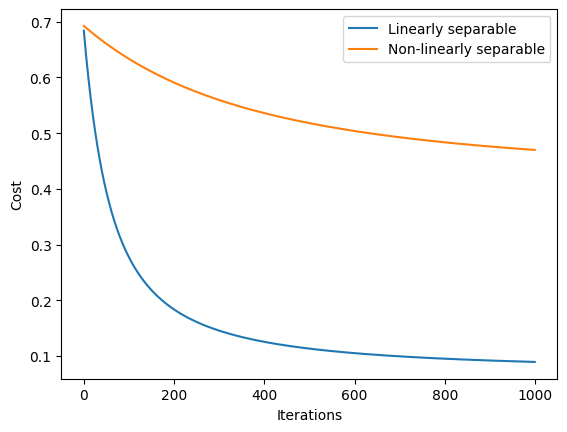

In [107]:
# Plot the cost function during training
plt.plot(cost_history_linear, label='Linearly separable')
plt.plot(cost_history_nonlinear, label='Non-linearly separable')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

## Plot Decision Boundary

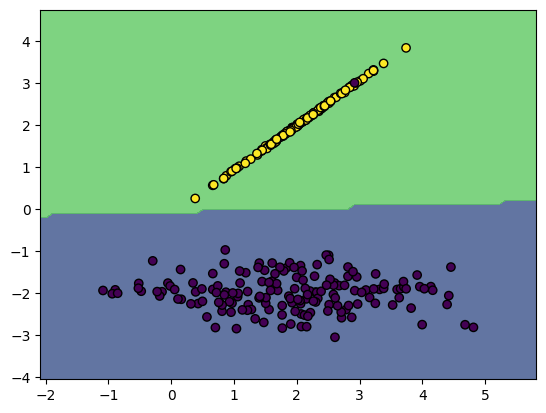

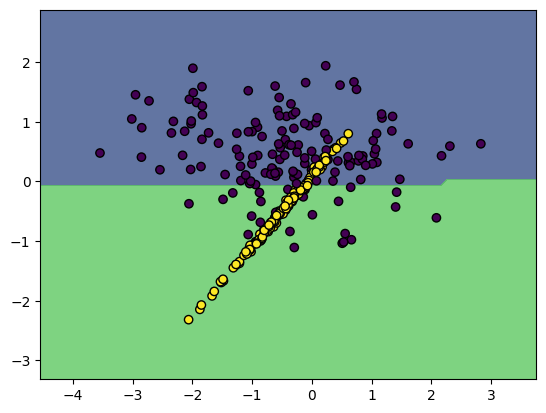

In [108]:
# Plot decision boundary
def plot_decision_boundary(theta, X, y):
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = predict(theta, np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 1], X[:, 2], c=y, edgecolor='k', marker='o')
    plt.show()

plot_decision_boundary(theta_linear, X_test_linear, y_test_linear)
plot_decision_boundary(theta_nonlinear, X_test_nonlinear, y_test_nonlinear)

## Run Tests for Multiple Runs and Calculate Average MAE and Standard Deviation

In [109]:
# Run tests to calculate average MAE and standard deviation over multiple runs
def run_tests(X, y, runs=10):
    maes = []
    for _ in range(runs):
        X_train, X_test, y_train, y_test = prepare_data(X, y)
        theta, _ = train_logistic_regression(X_train, y_train)
        y_pred = predict(theta, X_test)
        mae = mean_absolute_error(y_test, y_pred)
        maes.append(mae)
    return np.mean(maes), np.std(maes)

mean_mae_linear, std_mae_linear = run_tests(X_linear, y_linear)
mean_mae_nonlinear, std_mae_nonlinear = run_tests(X_nonlinear, y_nonlinear)

print(f'MAE (Linearly separable): Mean={mean_mae_linear}, Std={std_mae_linear}')
print(f'MAE (Non-linearly separable): Mean={mean_mae_nonlinear}, Std={std_mae_nonlinear}')

MAE (Linearly separable): Mean=0.013333333333333332, Std=1.734723475976807e-18
MAE (Non-linearly separable): Mean=0.18333333333333332, Std=0.0


## Final Results

In [110]:
# Final results
results = {
    'Data Type': ['Linearly separable', 'Non-linearly separable'],
    'Average MAE': [mean_mae_linear, mean_mae_nonlinear],
    'Standard Deviation': [std_mae_linear, std_mae_nonlinear]
}

df_results = pd.DataFrame(results)
print(df_results)

                Data Type  Average MAE  Standard Deviation
0      Linearly separable     0.013333        1.734723e-18
1  Non-linearly separable     0.183333        0.000000e+00


# Logistic Regression for Attack Classification

## Import Libraries

In [111]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

## Implement Metrics

In [112]:
# Confusion Matrix Elements Function
def compute_confusion_matrix_elements(y_true, y_pred):
    tp = ((y_true == 1) & (y_pred == 1)).sum().item() # True Positives
    tn = ((y_true == 0) & (y_pred == 0)).sum().item() # True Negatives
    fp = ((y_true == 0) & (y_pred == 1)).sum().item() # False Positives
    fn = ((y_true == 1) & (y_pred == 0)).sum().item() # False Negatives
    return tp, tn, fp, fn

# Precision Function
def compute_precision(tp, fp):
    return tp / (tp + fp) if tp + fp > 0 else 0

# Recall Function
def compute_recall(tp, fn):
    return tp / (tp + fn) if tp + fn > 0 else 0

# F1-score Function
def compute_f1(tp, fp, fn):
    prec = compute_precision(tp, fp)
    rec = compute_recall(tp, fn)
    return 2 * (prec * rec) / (prec + rec) if prec + rec > 0 else 0

## Unit Tests

In [113]:
# Unit tests
def test_metrics():
    y_true = torch.tensor([0, 1, 1, 0, 1, 0, 1, 1, 0, 1])
    y_pred = torch.tensor([0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

    # Convert PyTorch tensors to numpy arrays
    y_true_np = y_true.numpy()
    y_pred_np = y_pred.numpy()

    # Compute metrics using sklearn
    sk_precision = precision_score(y_true_np, y_pred_np)
    sk_recall = recall_score(y_true_np, y_pred_np)
    sk_f1 = f1_score(y_true_np, y_pred_np)

    # Compute metrics using custom functions and confusion matrix elements
    tp, tn, fp, fn = compute_confusion_matrix_elements(y_true, y_pred)
    custom_precision = compute_precision(tp, fp)
    custom_recall = compute_recall(tp, fn)
    custom_f1_score = compute_f1(tp, fp, fn)

    # Print results
    print(f"Sklearn Precision: {sk_precision}, Custom Precision: {custom_precision}")
    print(f"Sklearn Recall: {sk_recall}, Custom Recall: {custom_recall}")
    print(f"Sklearn F1-Score: {sk_f1}, Custom F1-Score: {custom_f1_score}")

test_metrics()

Sklearn Precision: 0.8, Custom Precision: 0.8
Sklearn Recall: 0.6666666666666666, Custom Recall: 0.6666666666666666
Sklearn F1-Score: 0.7272727272727273, Custom F1-Score: 0.7272727272727272


## Load and Preprocess Data

In [114]:
# Load dataset
df = pd.read_csv('UNSW_NB15_training-set.csv')

# Drop unwanted columns
df.drop(columns=['id'], inplace=True)

# Separate features and target
X = df.drop(columns=['label'])
y = df['label']

# Identify categorical columns to skip
categorical_columns = ['proto', 'service', 'state', 'attack_cat']

# Convert all columns to float64 except categorical ones
numerical_columns = [col for col in X.columns if col not in categorical_columns]
X_numerical = X[numerical_columns].astype('float64')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_numerical, y, test_size=0.3, random_state=42)

# Normalize data
mean = X_train.mean()
std = X_train.std()
X_train_normalized = (X_train - mean) / std
X_test_normalized = (X_test - mean) / std

# Print mean and std
print("Mean:\n", mean)
print("Std:\n", std)

Mean:
 dur                  1.011388e+00
spkts                1.836416e+01
dpkts                1.708332e+01
sbytes               7.647913e+03
dbytes               1.267130e+04
rate                 8.192843e+04
sttl                 1.811430e+02
dttl                 9.613966e+01
sload                6.464933e+07
dload                6.243612e+05
sloss                4.650698e+00
dloss                6.103102e+00
sinpkt               7.796649e+02
dinpkt               1.194760e+02
sjit                 6.390216e+03
djit                 5.273784e+02
swin                 1.335254e+02
stcpb                1.086340e+09
dtcpb                1.074725e+09
dwin                 1.285238e+02
tcprtt               5.619780e-02
synack               2.945619e-02
ackdat               2.674162e-02
smean                1.395873e+02
dmean                1.159232e+02
trans_depth          9.508606e-02
response_body_len    1.536291e+03
ct_srv_src           9.583808e+00
ct_state_ttl         1.367955e+00
ct_dst_

## Define Logistic Regression Model

In [115]:
# Logistic Regression model with normalization
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

In [116]:
# Logistic Regression model without normalization
class LogisticRegressionNoNorm(torch.nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionNoNorm, self).__init__()
        self.linear = torch.nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

## Train Model

In [117]:
# Function to train the model
def train_model(model, X_train, y_train, learning_rate=0.01, epochs=1000):
    criterion = torch.nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    X_train = torch.tensor(X_train.values, dtype=torch.float32)
    y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

    return model

## Evaluate Model

In [118]:
# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    X_test = torch.tensor(X_test.values, dtype=torch.float32)
    y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)
    y_pred = model(X_test)
    y_pred = y_pred.round()

    tp, tn, fp, fn = compute_confusion_matrix_elements(y_test, y_pred)
    return compute_precision(tp, fp), compute_recall(tp, fn), compute_f1(tp, fp, fn)

## Multiple Partitions and Collect Results

In [119]:
# Function to execute multiple partitions and evaluate the model
def multiple_partitions(X, y, n_partitions=30):
    precisions, recalls, f1_scores = [], [], []
    precisions_no_norm, recalls_no_norm, f1_scores_no_norm = [], [], []

    for _ in range(n_partitions):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

        # With normalization
        model_normalized = LogisticRegression(input_dim=X_train.shape[1])
        model_normalized = train_model(model_normalized, X_train, y_train)
        precision_norm, recall_norm, f1_norm = evaluate_model(model_normalized, X_test, y_test)
        precisions.append(precision_norm)
        recalls.append(recall_norm)
        f1_scores.append(f1_norm)

        # Without normalization
        model_no_norm = LogisticRegressionNoNorm(input_dim=X_train.shape[1])
        model_no_norm = train_model(model_no_norm, X_train, y_train)
        precision_no_norm, recall_no_norm, f1_no_norm = evaluate_model(model_no_norm, X_test, y_test)
        precisions_no_norm.append(precision_no_norm)
        recalls_no_norm.append(recall_no_norm)
        f1_scores_no_norm.append(f1_no_norm)

    results = {
        'With Normalization': {
            'Precision': (np.mean(precisions), np.std(precisions)),
            'Recall': (np.mean(recalls), np.std(recalls)),
            'F1-Score': (np.mean(f1_scores), np.std(f1_scores))
        },
        'Without Normalization': {
            'Precision': (np.mean(precisions_no_norm), np.std(precisions_no_norm)),
            'Recall': (np.mean(recalls_no_norm), np.std(recalls_no_norm)),
            'F1-Score': (np.mean(f1_scores_no_norm), np.std(f1_scores_no_norm))
        }
    }

    return results

# Run multiple partitions and print results
results = multiple_partitions(X_numerical, y)
print(pd.DataFrame(results))

                                  With Normalization  \
Precision   (0.610941414048935, 0.13088469794384844)   
Recall     (0.7148141933385487, 0.29565242132203556)   
F1-Score   (0.6224665313357128, 0.21123666486996365)   

                               Without Normalization  
Precision   (0.5617042552415824, 0.1644299563593367)  
Recall      (0.6792339151743536, 0.3371920472846777)  
F1-Score   (0.5806273393445355, 0.24788529551092306)  
